# Tugas Akhir
# Chihago Crimes Dataset

##### Anggota Kelompok:
1. Aditya Arya Hendrady (1506722733)
2. Arfi Renaldi (1506722872)
3. Harry Akbar Ali Munir (1506689080)
4. Rifki Adrian (1506726946)

###### Kelas A
###### Faculty of Computer Science, University of Indonesia

## 1) Environment Preparation

### 1.a) Library installation

In [7]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## 2) Data Preparation

In [8]:
df = pd.read_csv("Crimes_-_2001_to_present.csv")

print("Jumlah row: {}".format(df.shape[0]))
print("Jumlah feature: {}".format(df.shape[1]))
df.head()

Jumlah row: 6582553
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


### 2.a) Data Cleansing

#### Sampling

Sampling diperlukan karena terdapat jumlah baris yang sangat banyak (6582553 baris) sehingga akan menyebabkan proses komputasi yang besar. Data sample diambil sebanyak 30% sebanyak data populasi

In [11]:
import numpy as np
import random

df_sample = df.sample(n=300000)
print("Jumlah row: {}".format(df_sample.shape[0]))
print("Jumlah feature: {}".format(df_sample.shape[1]))
df_sample

Jumlah row: 300000
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2375573,7321631,HS125632,01/16/2010 08:00:00 PM,024XX W FULTON ST,0610,BURGLARY,FORCIBLE ENTRY,FACTORY/MANUFACTURING BUILDING,True,False,...,27.0,28.0,05,1159941.0,1901935.0,2010,02/10/2018 03:50:01 PM,41.886621,-87.688111,"(41.88662061, -87.688111161)"
3863717,2153283,HH402563,05/28/2002 07:20:00 AM,003XX N LA SALLE DR,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,...,42.0,8.0,06,1175074.0,1902840.0,2002,02/28/2018 03:56:25 PM,41.888778,-87.632512,"(41.888778301, -87.632512191)"
1942897,1486541,G222095,04/19/2001 09:20:00 AM,063XX S DR MARTN LUTHR KING JR DR,0330,ROBBERY,AGGRAVATED,DRUG STORE,False,False,...,NaN,NaN,03,1179972.0,1862959.0,2001,08/17/2015 03:03:40 PM,41.779231,-87.615749,"(41.779230788, -87.615748579)"
3699508,9890609,HX540782,12/09/2014 12:01:00 AM,035XX W LEXINGTON ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,...,24.0,27.0,11,1152927.0,1896474.0,2014,02/10/2018 03:50:01 PM,41.871777,-87.714013,"(41.87177688, -87.714013186)"
5019040,3802543,HL160759,02/03/2005 06:30:00 PM,048XX N SHERIDAN RD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,OTHER,True,False,...,48.0,3.0,17,1168756.0,1932490.0,2005,02/28/2018 03:56:25 PM,41.970279,-87.654852,"(41.970278623, -87.65485248)"
5450552,4928575,HM543351,08/16/2006 03:00:00 AM,076XX S COLES AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,7.0,43.0,07,1196188.0,1855314.0,2006,02/28/2018 03:56:25 PM,41.757866,-87.556553,"(41.757865688, -87.556553285)"
3773859,2001333,HH200471,02/21/2002 07:00:00 AM,004XX W LOCUST ST,0810,THEFT,OVER $500,STREET,False,False,...,NaN,NaN,06,1173203.0,1906519.0,2002,02/28/2018 03:56:25 PM,41.898915,-87.639274,"(41.898915415, -87.639273854)"
747536,11272714,JB207371,04/01/2018 10:05:00 AM,095XX S LA SALLE ST,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,False,...,21.0,49.0,18,1176957.0,1841794.0,2018,04/23/2018 03:50:11 PM,41.721220,-87.627438,"(41.721220015, -87.627438388)"
1285104,4627068,HM143532,01/25/2006 08:30:00 AM,115XX S MICHIGAN AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,9.0,53.0,16,1178884.0,1828608.0,2006,02/10/2018 03:50:01 PM,41.684992,-87.620780,"(41.684992237, -87.620779831)"
2439709,7425350,HS227030,03/26/2010 06:45:00 AM,101XX S BENSLEY AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,10.0,51.0,05,1194488.0,1838273.0,2010,02/10/2018 03:50:01 PM,41.711146,-87.563342,"(41.711145653, -87.563342189)"


#### Mengecek Null Values

In [16]:
df_sample.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      185
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                    28033
Community Area          28087
FBI Code                    0
X Coordinate             5756
Y Coordinate             5756
Year                        0
Updated On                  0
Latitude                 5756
Longitude                5756
Location                 5756
dtype: int64

Dikarenakan adanya null values, sehingga kami perlu menghandle missing values.
Penanganan missing values ini dibagi menjadi 2 kategori yaitu pada data kategorikal dan data numerikal.
- Pada data numerikal, kami memutuskan untuk mengisi missing values dengan nilai median pada setiap fitur
- Pada data kategorikal, kami memutuskan untuk mengisi missing values dengan nilai modus pada setiap fitur

In [17]:
location_description_mode = df_sample["Location Description"].mode()
district_mean = df_sample["District"].mean()
ward_mean = df_sample["Ward"].mean()
community_area_mean = df_sample["Community Area"].mean()
x_coordinate_mean = df_sample["X Coordinate"].mean()
y_coordinate_mean = df_sample["Y Coordinate"].mean()
latitude_mean = df_sample["Latitude"].mean()
longitude_mean = df_sample["Longitude"].mean()

df_clean = df_sample.fillna(value={
    "Location Description": location_description_mode[0],
    "District" : district_mean,
    "Ward": ward_mean,
    "Community Area": community_area_mean,
    "X Coordinate": x_coordinate_mean,
    "Y Coordinate" : y_coordinate_mean,
    "Latitude" : latitude_mean,
    "Longitude" : longitude_mean,
    "Location" : "({},{})".format(latitude_mean, longitude_mean)
})

df_clean.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [70]:
df_clean['Arrest'].value_counts()

0    215977
1     84023
Name: Arrest, dtype: int64

In [68]:
labelencoder_y = LabelEncoder()
arrest = labelencoder_y.fit_transform(df_clean["Arrest"])
df_clean["Arrest"] = arrest
domestic = labelencoder_y.fit_transform(df_clean["Domestic"])
df_clean["Domestic"] = domestic

df_clean['Arrest'].value_counts()
random.seed(42)
n = round(len(df_clean[df_clean['Arrest'] == 1]) * random.uniform(1.0, 2.0))
df_clean_balanced = df_clean[df_clean['Arrest'] == 1].append(df_clean[df_clean['Arrest'] == 0].sample(n))
df_clean_balanced['Arrest'].value_counts()

0    137750
1     84023
Name: Arrest, dtype: int64

####  Mengecek Outlier
Sebelum data digunakan lebih lanjut, kami perlu mengecek apakah ada outlier pada data.
Kami menggunakan box plot untuk melihat apakah ada outlier. Pada boxplot outlier ditandai dengan titik-titik hitam.

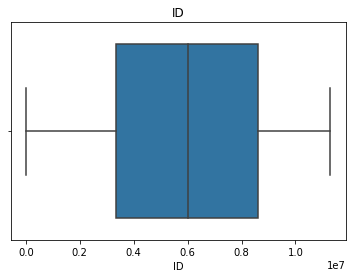

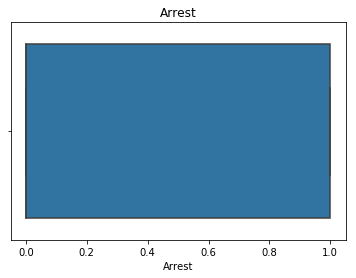

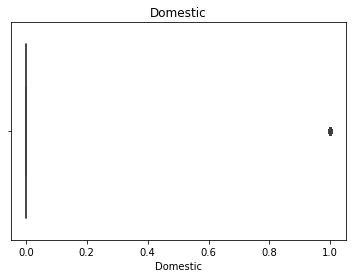

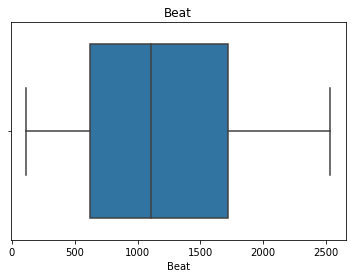

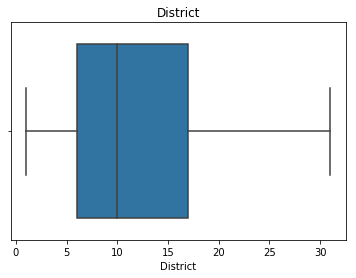

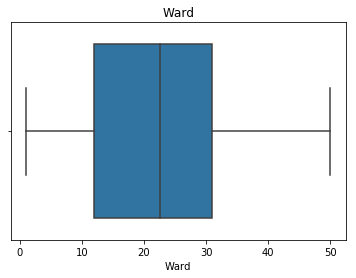

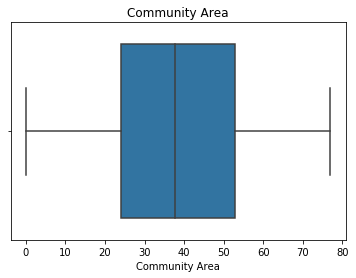

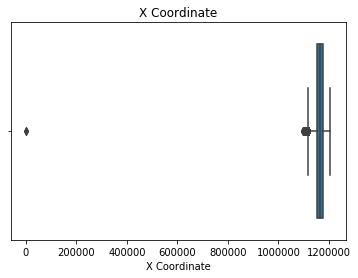

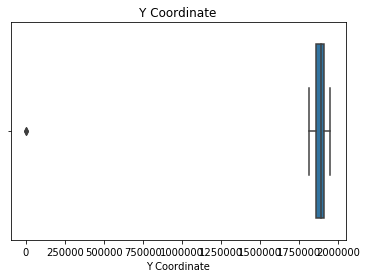

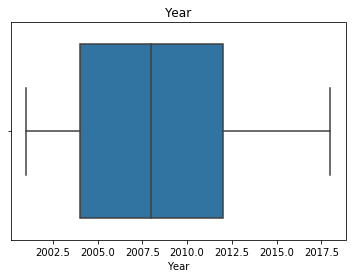

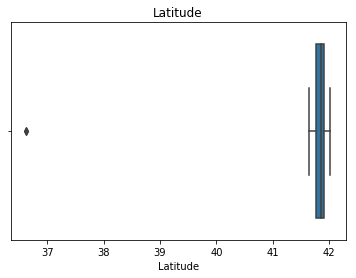

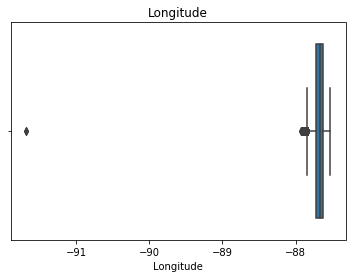

In [39]:
%matplotlib inline

def is_categorical(array_like):
    return array_like.dtype.name == 'object'

def box_plot(data, feature):
    if(not is_categorical(data)):
        sns.boxplot(data).set_title(feature)
        plt.show()

for i in df_clean:
    box_plot(df_clean_balanced[i], i)

Pada boxplot di atas terlihat bahwa ada beberapa feature yang memiliki outlier di dalamnya.
Diantaranya adalah:
- Domestic
- X Coordinate
- Y Coordinate
- Latitude
- Longitude

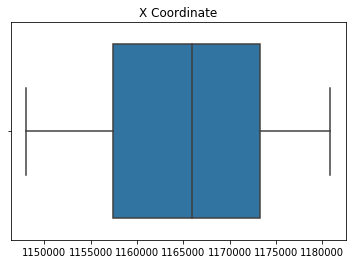

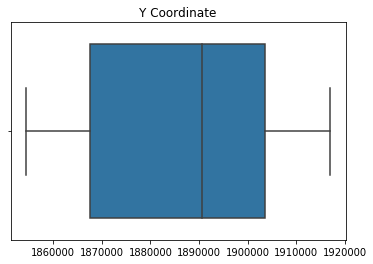

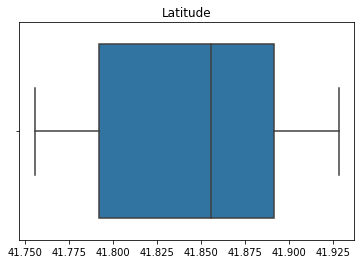

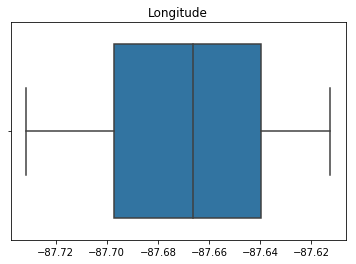

In [42]:
def remove_outlier(feature):
    arr = df_clean_balanced[feature]
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    final_list = [x for x in arr if (x > mean - 1 * sd)]
    final_list = [x for x in final_list if (x < mean + 1 * sd)]

    #visualisasi
    sns.boxplot(final_list).set_title(feature)
    plt.show()

features_with_outlier = ["X Coordinate", "Y Coordinate", "Latitude", "Longitude"]
for feature in features_with_outlier:
    remove_outlier(feature)

In [78]:
df.describe() - df_sample.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.282553e+06,6.282553e+06,6.282503e+06,5.695732e+06,5.694611e+06,6.162898e+06,6.162898e+06,6.282553e+06,6.162898e+06,6.162898e+06
mean,-2.992413e+03,1.492689e+00,1.225453e-02,2.891313e-02,-1.683243e-02,-3.894446e+01,1.182953e+01,-4.632417e-03,3.304537e-05,-1.410358e-04
std,-1.824935e+03,-1.807074e+00,-1.814029e-02,-9.207363e-03,4.841951e-03,1.334527e+02,2.186986e+02,-4.040594e-03,6.087977e-04,4.275785e-04
min,-2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-4.215000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,3.125000e+01,0.000000e+00,5.356300e-05,6.323100e-05
50%,-8.665000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.600000e+01,-1.650000e+01,0.000000e+00,-6.320500e-06,-1.035210e-04
75%,-4.067000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,-5.375000e+01,0.000000e+00,-1.144412e-04,-2.358440e-04
max,5.670000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00,2.703220e-04,8.700000e-08


In [77]:
df_sample.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,3.000000e+05,300000.000000,299999.000000,271967.000000,271913.000000,2.942440e+05,2.942440e+05,300000.000000,294244.000000,294244.000000
mean,6.099228e+06,1191.740180,11.293744,22.626958,37.628642,1.164543e+06,1.885682e+06,2008.082987,41.841908,-87.671710
std,2.964917e+06,705.401207,6.964280,13.832380,21.528661,1.679167e+04,3.215420e+04,4.832573,0.088461,0.060905
min,6.550000e+02,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,3.375526e+06,622.000000,6.000000,10.000000,23.000000,1.152896e+06,1.859128e+06,2004.000000,41.768813,-87.713971
50%,6.070974e+06,1111.000000,10.000000,22.000000,32.000000,1.165986e+06,1.890386e+06,2008.000000,41.854918,-87.666199
75%,8.655991e+06,1731.000000,17.000000,34.000000,58.000000,1.176365e+06,1.909398e+06,2012.000000,41.907054,-87.628209
max,1.129259e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951532e+06,2018.000000,42.022640,-87.524529


Nah, sekarang data tersebut sudah tidak memiliki outlier.

### 2.b) Feature Extraction

Pada tahap ini, akan dipilih fitur mana yang akan digunakan dengan melihat korelasi antar fitur dengan metode Spearman dan/atau Pearson

In [80]:
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix


object_var = df_clean_balanced.select_dtypes(include=['object']).copy()
print(object_var.shape)
numeric_var = df_clean_balanced.select_dtypes(include=['int64','float64']).copy()
for col in object_var.columns:
    if(col!= 'IUCR' and col != 'Date' and col != 'Block' and col != 'Updated On' and col != 'Location' and col != 'Case Number' and col !='Description'):
        print(col)
        object_var = pd.get_dummies(object_var, columns=[col])

df_encoded = pd.concat([object_var, numeric_var],axis=1)
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(data_sample_non_categorical["y"])
# data_sample_non_categorical["y"] = y
# default = labelencoder_y.fit_transform(data_sample_non_categorical["default"])
# data_sample_non_categorical["default"] = default
# housing = labelencoder_y.fit_transform(data_sample_non_categorical["housing"])
# data_sample_non_categorical["housing"] = housing
# loan = labelencoder_y.fit_transform(data_sample_non_categorical["loan"])
# data_sample_non_categorical["loan"] = loan
df_encoded['Arrest']

(221773, 10)
Primary Type
Location Description
FBI Code


2375573    1
5019040    1
747536     1
1285104    1
4227897    1
133464     1
1459850    1
2170708    1
1238306    1
3993830    1
6161424    1
5303221    1
1268533    1
6530908    1
4266001    1
1932521    1
2633660    1
4573503    1
3273397    1
1959701    1
4632531    1
276737     1
4009647    1
2749035    1
1718751    1
3239778    1
1950744    1
3312131    1
4969670    1
5769751    1
          ..
2247669    0
5429675    0
2721783    0
11570      0
4846791    0
426875     0
5398535    0
4303973    0
573531     0
1540731    0
4598308    0
1827331    0
5424628    0
3358885    0
1292319    0
5758271    0
2876032    0
20778      0
5836097    0
144871     0
322092     0
5097299    0
6527220    0
569310     0
5854218    0
1280750    0
4433215    0
4265021    0
1314728    0
3670509    0
Name: Arrest, Length: 221773, dtype: int64

In [79]:
df_encoded.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

KeyboardInterrupt: 

In [ ]:
correlation = pd.DataFrame()
for col in df_clean:
    if col != 'price':
        pearson = automobile_final['price'].corr(automobile_final[col], method='pearson')
        correlation.loc["price-{}".format(col), "pearson"] = pearson
        spearman = automobile_final['price'].corr(automobile_final[col], method='spearman')
        correlation.loc["price-{}".format(col), "spearman"] = spearman
correlation.sort_values(by=['pearson'], ascending = False)

### 2.c) Data Analysis

## 3) Accuracy Testing

### 3.a) Test a few machine learning algorithm with your dataset